In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline

In [2]:
df1=pd.read_csv('drive/MyDrive/tmdb-movies.csv')
df = df1.copy()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#drop unuseful columns
df.drop(['id', 'imdb_id', 'homepage', 'overview'], axis=1, inplace=True)

#Ways to handle missing data
#For all missing data with object as datatype, I fill in with string "missing"
df['cast'].fillna('missing',inplace=True)
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True)
df['budget'] = df['budget'].replace(0, np.NAN)

In [10]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

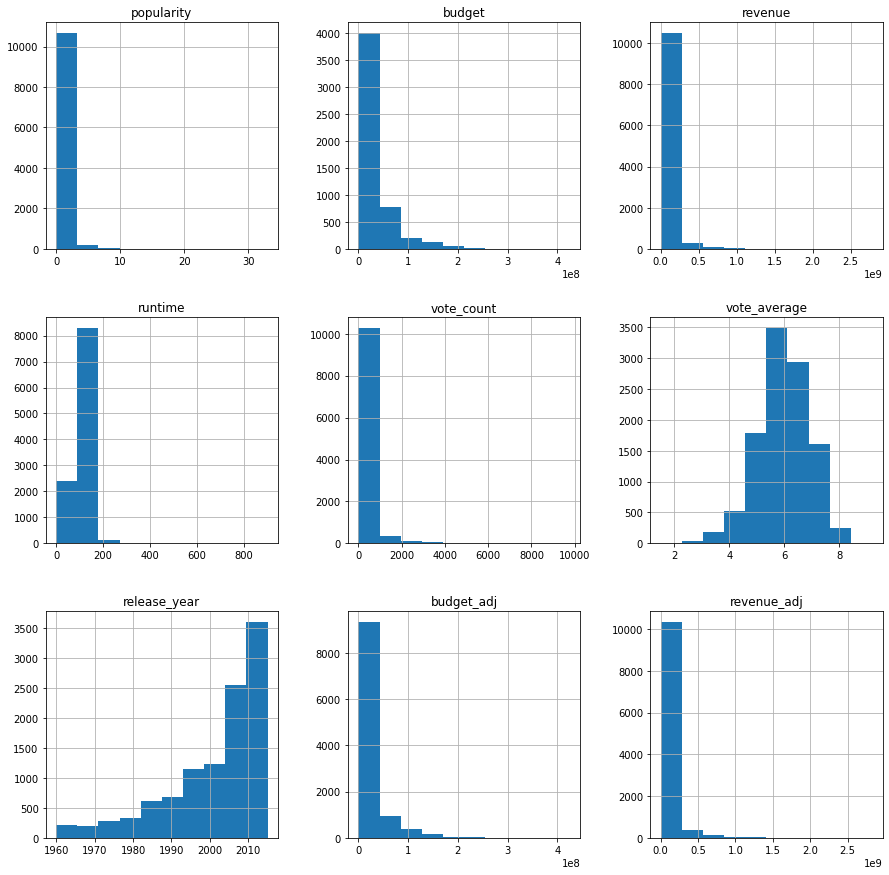

In [13]:
df.hist(figsize=(15,15));

## **Exploration with Visuals and Conclusion**

Question 1. Does higher budget means higher popularity ? Is there a coefficient relationship

Text(0, 0.5, 'popularity')

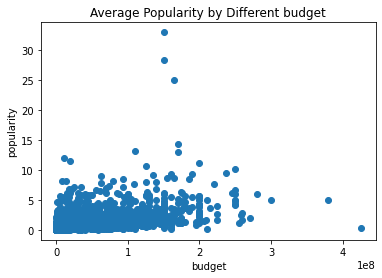

In [14]:
x = df['budget']
y = df['popularity']
plt.scatter(x,y)
plt.title('Average Popularity by Different budget', fontsize=12)
plt.xlabel('budget', fontsize=10)
plt.ylabel('popularity', fontsize=10)

In [15]:
#based on median budget value to divide the budget into two groups: low and high
m = df['budget'].median()
low_budg = df.query('budget < {} '.format(m))
high_budg = df.query('budget >= {} '.format(m))

In [16]:
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

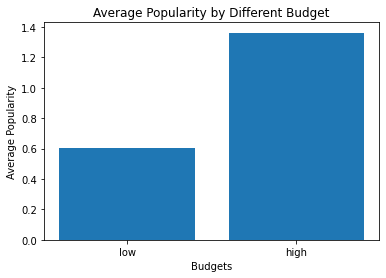

In [17]:
locations = [1,2]
heights = [mean_popularity_of_low_budget, mean_popularity_of_high_budget]
labels = ['low', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [18]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget)/ mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

Conclusion for Q1: Through this bar plot, we can clearly see that  high budget movies are more likely to higher popularity. We can make this conclusion that higher budget movies gains more than 50% higher popularity than low budgeet movies.

Q2. Will the runtime affect the vote count and popularity?

In [19]:
short = df.query('runtime < {}'.format(100))
medium = df.query('runtime < {} > {}'.format(200, 100))
long = df.query('runtime > {}'.format(200))

In [20]:
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

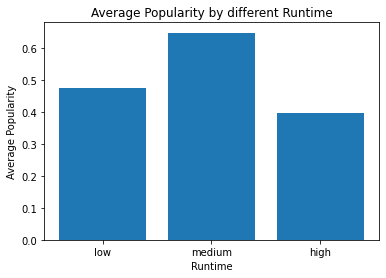

In [21]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels = ['low', 'medium', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

Text(0, 0.5, 'popularity')

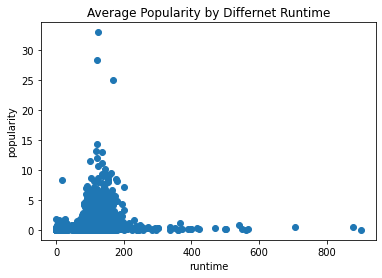

In [22]:
x = df['runtime']
y = df['popularity']

plt.scatter(x,y)
plt.title('Average Popularity by Differnet Runtime', fontsize = 12)
plt.xlabel('runtime', fontsize=10)
plt.ylabel('popularity', fontsize=10)

Conclusion Q2: Combine two plots above, we can not simply say, the longer 

In [26]:
# we need to get the mean of popularity 
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

In [27]:
# create a new column called profit. profit = Revenue - budget
df['profit'] = df['revenue'] - df['budget']
#df['profit'].head(20)
#df.head()

In [28]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()
# df.head()

Text(0, 0.5, 'Average Profit')

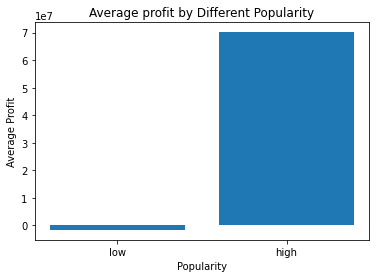

In [29]:
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels = ['low', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

Conclusion for 3: as we can see above, higher popularity does make much higher average profits

Q4. Features Associated with Top 10 Revenue Movies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a578a65c0>,
      dtype=object)

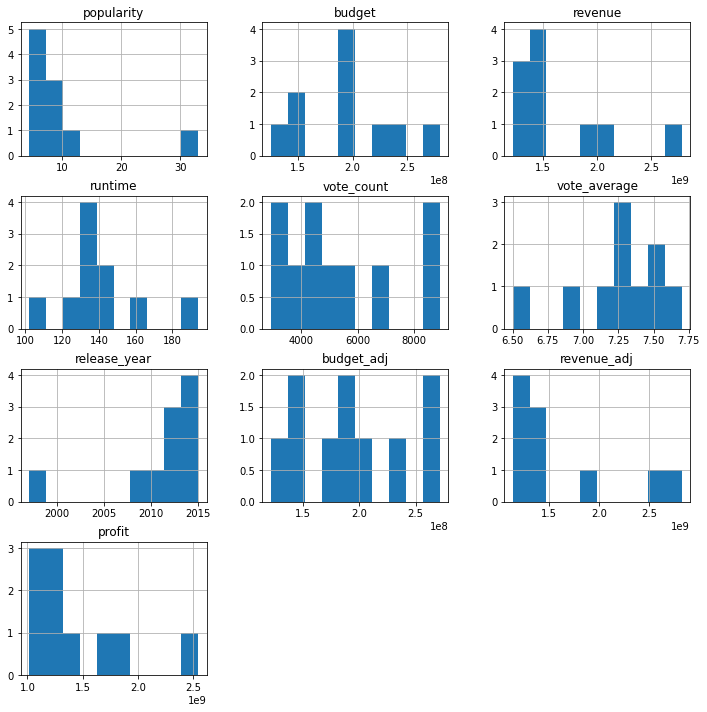

In [30]:
top10_revenue = df.nlargest(10, 'revenue')
top10_revenue.hist(figsize=(12,12))

Conslusion for 4: There are characteristics we can conclude form top 10 movies. Runtime ranges from 100 min to 200 mins. The release year are between 1995 to 2015.

Q5. Which genres are most popular from year to year ?

In [31]:
def extract_data(column_name):
  data = df[column_name].str.cat(sep='|')
  data = pd.Series(data.split('|'))
  count = data.value_counts(ascending=False)
  return count

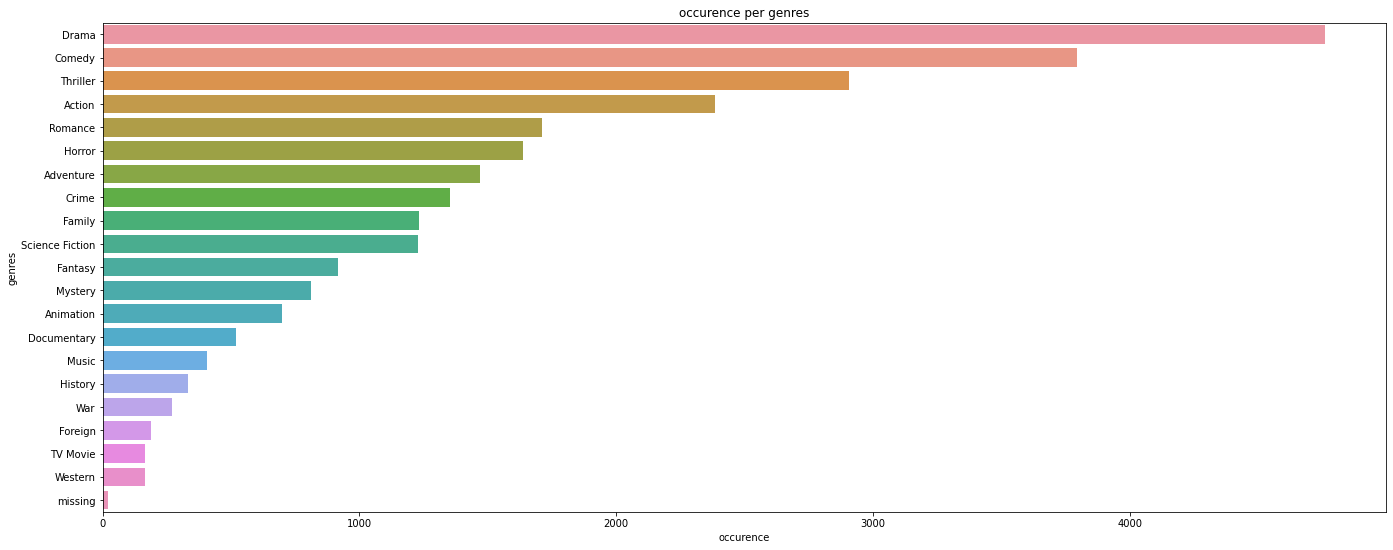

In [32]:
genre_count = extract_data('genres')
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values})

f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y='genres', data=df_genre_counts)
ax.set_title('occurence per genres')
ax.set_xlabel('occurence')
ax.set_ylabel('genres')
plt.show()

In [33]:
director_count = extract_data('director')
director_count

Woody Allen             46
missing                 44
Clint Eastwood          34
Martin Scorsese         31
Steven Spielberg        30
                        ..
Trevor White             1
Patrick Morris           1
Emily Young              1
James Glenn Dudelson     1
Mickey Rose              1
Length: 5363, dtype: int64

Text(0, 0.5, 'number of movies')

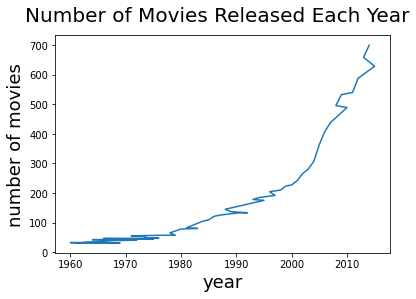

In [34]:
movie_count = df['release_year'].value_counts()
#movie_count.plot(xlabel='year',ylabel='number of movies', title='Number of Movies Release Each year')
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year', fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies', fontsize=18)

Conclusion for 5:
Throught above two plots we can see the top 5 genres are Drama, Comedy, action, Horro and Adventure The number of movies increased along time.

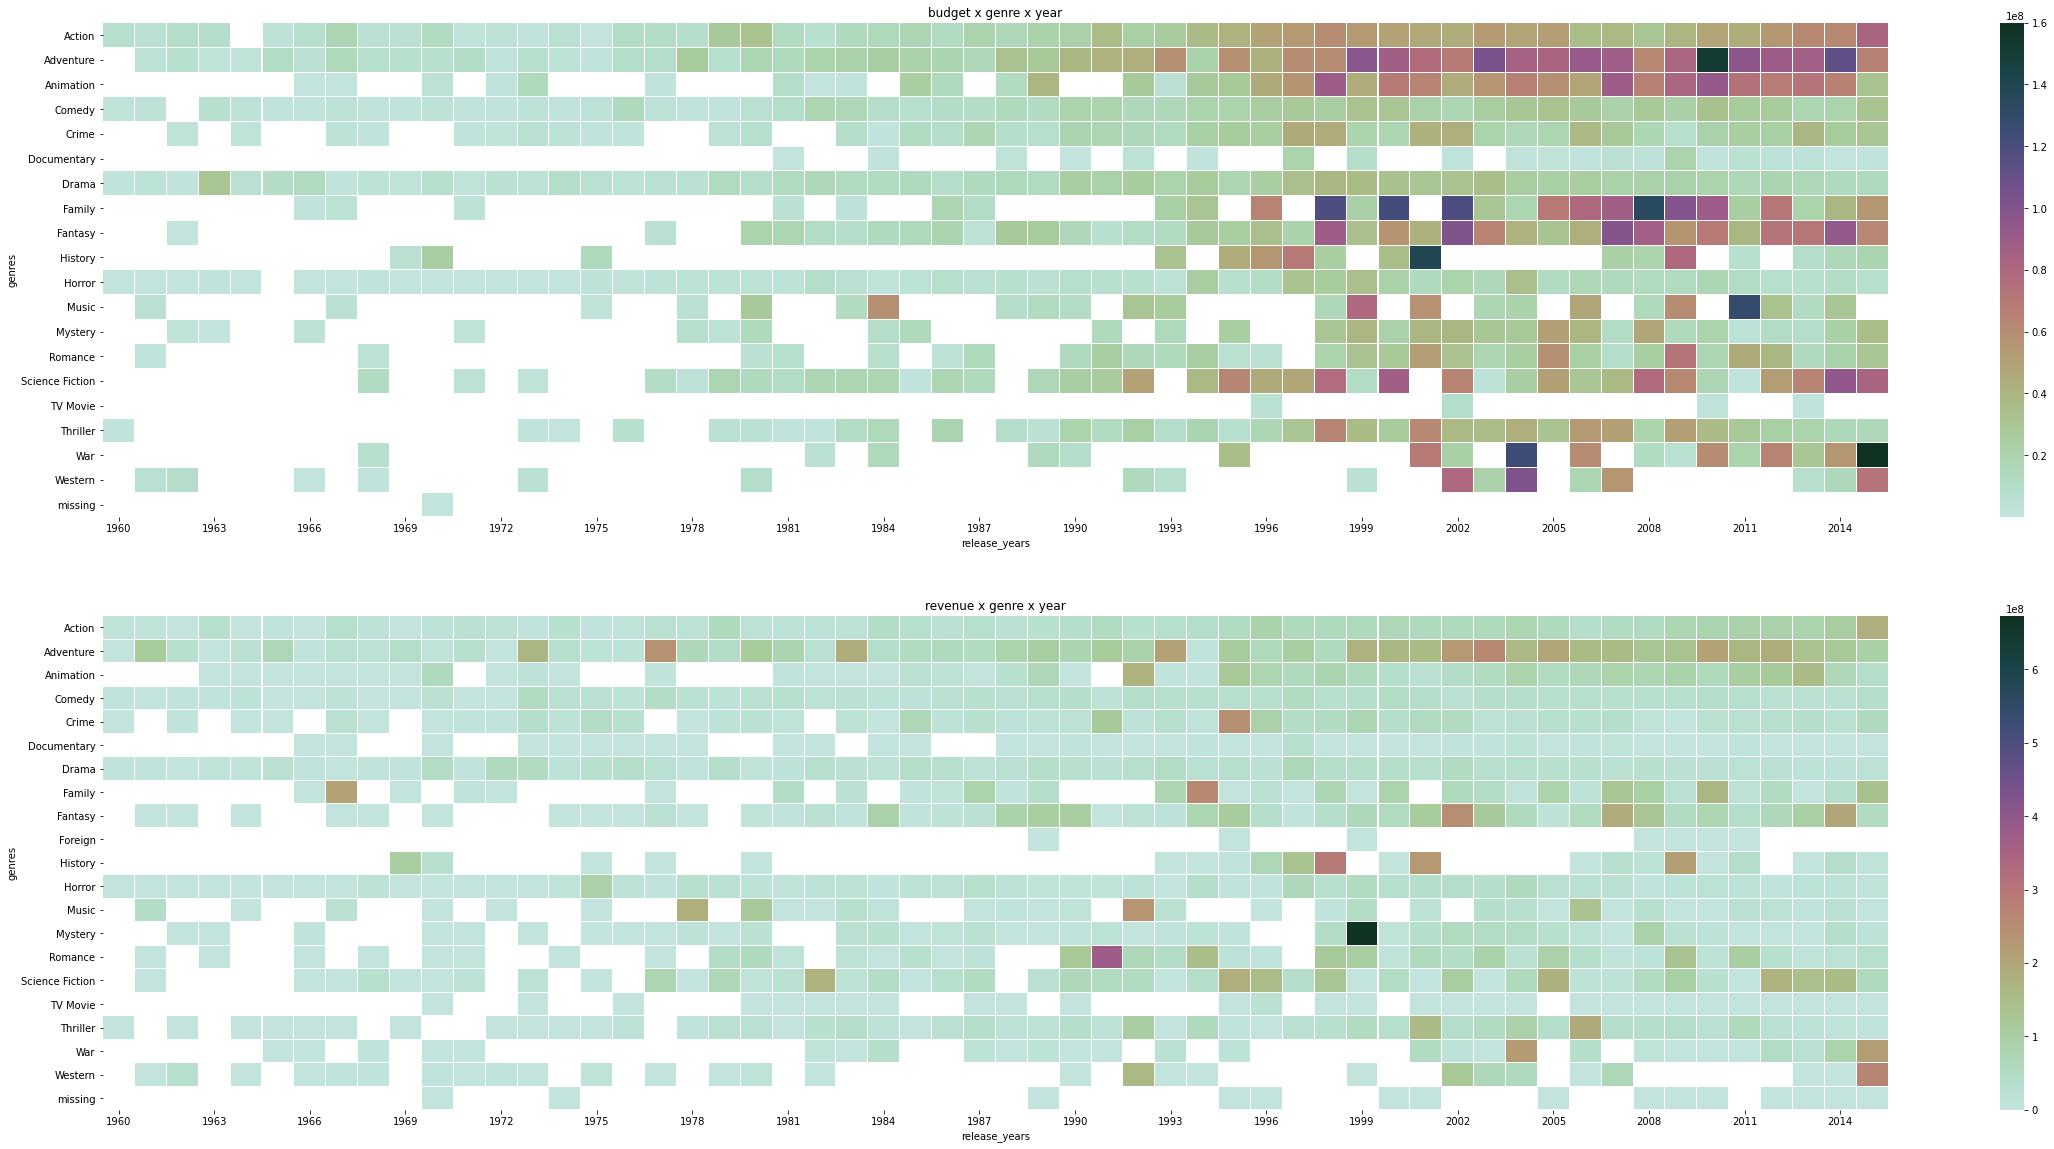

In [35]:
df['genre'] = df['genres'].apply(lambda x: x.split('|')[0])

# ploting all the genre types for each year with the budget and revenue
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('budget x genre x year')
axA.set_xlabel('release_years')
axA.set_ylabel('genres')


axB.set_title('revenue x genre x year')
axB.set_xlabel('release_years')
axB.set_ylabel('genres')
plt.show()